## Table of Contents
1. Import Libraries and Data
2. Feature Scaling/Normalization
3. Silhouette Score Analysis
4. Cluster Implementation, Analysis, and Profiling
5. Visualization with Dimensionality Reduction
6. Prepare for Tableau Visualization

## 1. Import Libraries and Data

In [47]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import plotly.express as px

In [48]:
## Set preferred visualization styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

In [49]:
df_cluster = pd.read_csv('/Users/samabrams/Data Analysis Projects/CO2_Emissions_Project/02 Data/Prepared Data/prepared_emissions_data_2019.csv')

In [50]:
df_cluster.shape

(228, 20)

In [51]:
df_cluster.head()

,country,year,iso_code,co2,co2_per_capita,co2_growth_abs,coal_co2,oil_co2,gas_co2,cement_co2,cumulative_co2,cumulative_luc_co2,land_use_change_co2,population,gdp,entity_type,fossil_emissions,coal_share,oil_share,gas_share
0,Afghanistan,2019,AFG,11.082,0.293,0.264,3.955,6.843,0.246,0.038,194.437,860.417,0.330,37769496.0,NaN,Country,11.044,0.358113,0.619612,0.022275
1,Aland Islands,2019,ALA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.276,0.000,NaN,NaN,Country,NaN,NaN,NaN,NaN
2,Albania,2019,ALB,4.947,1.722,-0.037,0.322,3.440,0.132,1.048,284.491,454.263,0.220,2873883.0,NaN,Country,3.894,0.082691,0.883410,0.033898
3,Algeria,2019,DZA,179.505,4.203,5.593,1.096,59.158,91.250,11.028,4513.793,1231.617,2.162,42705372.0,NaN,Country,151.504,0.007234,0.390472,0.602294
4,Andorra,2019,AND,0.480,6.286,-0.015,0.000,0.480,0.000,0.000,14.583,0.806,0.000,76361.0,NaN,Country,0.480,0.000000,1.000000,0.000000


## 2. Feature Scaling and Normalization

In [53]:
## Feature selection
clustering_features = ['co2_per_capita', 'coal_share', 'oil_share', 'gas_share', 'cumulative_co2']

In [54]:
## Checking for missing values in selected features
df_cluster[clustering_features].isnull().sum()

co2_per_capita    14
coal_share        14
oil_share         14
gas_share         14
cumulative_co2    14
dtype: int64

In [55]:
## Create dataframe with just clustering features
df_to_scale = df_cluster[clustering_features].copy()

In [56]:
df_to_scale.shape

(228, 5)

In [57]:
## Fit and transform data using a scaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_to_scale)

In [58]:
df_scaled = pd.DataFrame(scaled_data, columns=clustering_features)

In [59]:
df_scaled.head()

,co2_per_capita,coal_share,oil_share,gas_share,cumulative_co2
0,-0.810474,0.907410,-0.208621,-0.645599,-0.215066
1,NaN,NaN,NaN,NaN,NaN
2,-0.552551,-0.306816,0.682199,-0.593503,-0.212446
3,-0.104750,-0.639477,-0.982407,1.953949,-0.089361
4,0.271215,-0.671370,1.075911,-0.745430,-0.220301


## 3. Silhouette Score Analysis

This section explore a couple different options to determine optimal clusters for the hierarchical analysis before finally settling on silhouette scores. Those alternate approaches remain in the code, but the elbow curve at the bottom of the section reflects the silhouette scores determined below.

In [61]:
## Determine the optimal number of clusters
inertia = []
silhouette_scores = []
k_range = range(2, 11)  # Test from 2 to 10 clusters

for k in k_range:
    # Create and fit the model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    
    # Calculate inertia
    inertia.append(kmeans.inertia_)
    
    # Calculate silhouette score
    silhouette = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette)
    
    print(f"k={k}, Inertia={kmeans.inertia_:.2f}, Silhouette Score={silhouette:.3f}")

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [87]:
## Fill in Nan values with imputed mean
df_scaled_clean = df_scaled.fillna(df_scaled.mean())

In [89]:
##Take 2

# Initialize empty lists to store metrics
inertia = []
silhouette_scores = []
k_range = range(2, 11)

In [91]:
# Calculate metrics for different k values
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled_clean)
    
    inertia.append(kmeans.inertia_)
    silhouette = silhouette_score(df_scaled_clean, kmeans.labels_)
    silhouette_scores.append(silhouette)

AttributeError: 'NoneType' object has no attribute 'split'

In [93]:
df_scaled_clean.shape

(228, 5)

In [95]:
df_scaled_clean.dtypes

co2_per_capita    float64
coal_share        float64
oil_share         float64
gas_share         float64
cumulative_co2    float64
dtype: object

In [97]:
# Calculate metrics for different k values 
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled_clean)
    inertia.append(kmeans.inertia_)
    silhouette = silhouette_score(df_scaled_clean, kmeans.labels_)
    silhouette_scores.append(silhouette)

AttributeError: 'NoneType' object has no attribute 'split'

In [99]:
## I'm going to try a different method to determine the number of clusters

num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [101]:
## Create list of scores
score = [kmeans[i].fit(df_scaled_clean).score(df_scaled_clean) for i in range(len(kmeans))]

AttributeError: 'NoneType' object has no attribute 'split'

In [103]:
df_scaled_clean.isnull().sum()

co2_per_capita    0
coal_share        0
oil_share         0
gas_share         0
cumulative_co2    0
dtype: int64

k=2, Silhouette Score=0.334
k=3, Silhouette Score=0.382
k=4, Silhouette Score=0.389
k=5, Silhouette Score=0.421
k=6, Silhouette Score=0.409
k=7, Silhouette Score=0.427
k=8, Silhouette Score=0.431
k=9, Silhouette Score=0.425


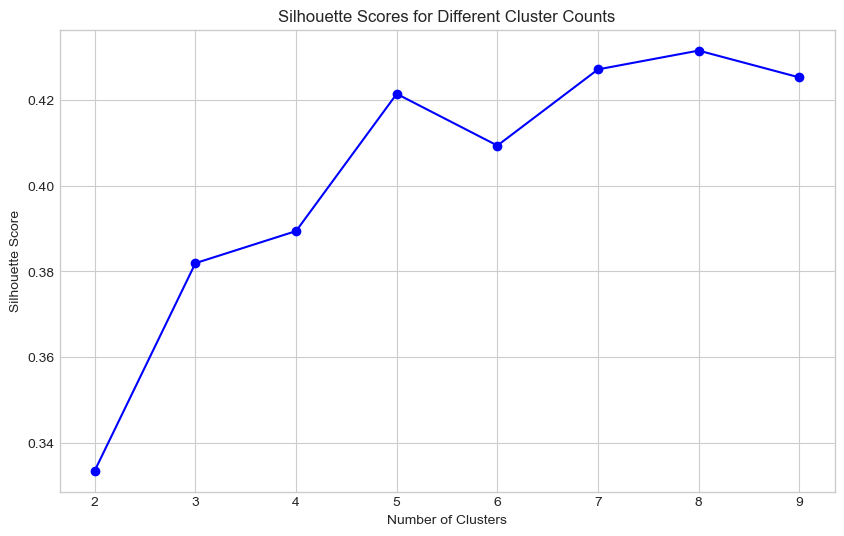

In [105]:
## I'm going to try a different clustering method since this isn't working

from sklearn.cluster import AgglomerativeClustering

# Test different cluster counts
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    hc = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = hc.fit_predict(df_scaled_clean)
    score = silhouette_score(df_scaled_clean, labels)
    silhouette_scores.append(score)
    print(f"k={k}, Silhouette Score={score:.3f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'o-', color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Cluster Counts')
plt.grid(True)
plt.show()

## 4. Cluster Implementation, Analysis, and Profiling

In [108]:
## Apply hierarchical clustering with 5 clusters
optimal_k = 5
hc = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
cluster_labels = hc.fit_predict(df_scaled_clean)

# Add cluster labels to original dataframe
df_cluster['cluster'] = cluster_labels

# Check the distribution of clusters
cluster_counts = df_cluster['cluster'].value_counts().sort_index()
cluster_counts

cluster
0    89
1    92
2    34
3     1
4    12
Name: count, dtype: int64

In [110]:
# Find the outlier country
outlier = df_cluster[df_cluster['cluster'] == 3]['country'].values[0]
print(f"Outlier country: {outlier}")

# Check its values
print(df_cluster[df_cluster['country'] == outlier][clustering_features])

Outlier country: United States
     co2_per_capita  coal_share  oil_share  gas_share  cumulative_co2
217          15.731      0.2098   0.462194   0.328007      412183.812


In [112]:
## Apply hierarchical clustering with 5 clusters
optimal_k = 8
hc = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
cluster_labels = hc.fit_predict(df_scaled_clean)

# Add cluster labels to original dataframe
df_cluster['cluster'] = cluster_labels

# Check the distribution of clusters
cluster_counts = df_cluster['cluster'].value_counts().sort_index()
cluster_counts

cluster
0    74
1    12
2    29
3    11
4     5
5    15
6    81
7     1
Name: count, dtype: int64

In [114]:
# Find the outlier country
outlier = df_cluster[df_cluster['cluster'] == 7]['country'].values[0]
print(f"Outlier country: {outlier}")

# Check its values
print(df_cluster[df_cluster['country'] == outlier][clustering_features])

Outlier country: United States
     co2_per_capita  coal_share  oil_share  gas_share  cumulative_co2
217          15.731      0.2098   0.462194   0.328007      412183.812


I'm going to use 5 clusters for my main analysis, but I want to create labels for an 8 cluster analysis to be performed later should time allow. With both clusters, the USA will stand alone as a cluster unto itself, emphasizing the effect that the country has on global emissions compared to other countries.

In [117]:
## Apply hierarchical clustering with 5 clusters (main analysis)
hc_5 = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster_labels_5 = hc_5.fit_predict(df_scaled_clean)

# Add 5-cluster labels to original dataframe
df_cluster['cluster_5'] = cluster_labels_5

## Apply hierarchical clustering with 8 clusters (advanced analysis)
hc_8 = AgglomerativeClustering(n_clusters=8, linkage='ward')
cluster_labels_8 = hc_8.fit_predict(df_scaled_clean)

# Add 8-cluster labels to original dataframe
df_cluster['cluster_8'] = cluster_labels_8

# Check the distributions
print("5-Cluster Distribution:")
print(df_cluster['cluster_5'].value_counts().sort_index())

print("\n8-Cluster Distribution:")
print(df_cluster['cluster_8'].value_counts().sort_index())

5-Cluster Distribution:
cluster_5
0    89
1    92
2    34
3     1
4    12
Name: count, dtype: int64

8-Cluster Distribution:
cluster_8
0    74
1    12
2    29
3    11
4     5
5    15
6    81
7     1
Name: count, dtype: int64


In [119]:
## Calculate profiles for 5-cluster solution
cluster_profiles_5 = df_cluster.groupby('cluster_5')[['co2_per_capita', 'coal_share', 'oil_share', 'gas_share', 'cumulative_co2']].mean().round(2)

## Calculate profiles for 8-cluster solution
cluster_profiles_8 = df_cluster.groupby('cluster_8')[['co2_per_capita', 'coal_share', 'oil_share', 'gas_share', 'cumulative_co2']].mean().round(2)

# Display the profiles
print("5-Cluster Profiles:")
print(cluster_profiles_5)

print("\n8-Cluster Profiles:")
print(cluster_profiles_8)

5-Cluster Profiles:
           co2_per_capita  coal_share  oil_share  gas_share  cumulative_co2
cluster_5                                                                  
0                    3.53        0.14       0.55       0.31         4066.53
1                    2.88        0.02       0.98       0.01          127.79
2                    6.82        0.59       0.29       0.12        24310.22
3                   15.73        0.21       0.46       0.33       412183.81
4                   20.52        0.02       0.38       0.60         5630.68

8-Cluster Profiles:
           co2_per_capita  coal_share  oil_share  gas_share  cumulative_co2
cluster_8                                                                  
0                    3.53        0.17       0.60       0.23         4019.88
1                   20.52        0.02       0.38       0.60         5630.68
2                    6.55        0.63       0.29       0.09         8656.62
3                   10.88        0.02       0.9

## 5. Visualization with Dimensionality Reduction

In [122]:
# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Apply PCA transformation to scaled data
pca_coords = pca.fit_transform(df_scaled_clean)

# Create a dataframe with PCA results
pca_df = pd.DataFrame({
    'x': pca_coords[:, 0],
    'y': pca_coords[:, 1],
    'country': df_cluster['country'],
    'cluster_5': df_cluster['cluster_5'],
    'cluster_8': df_cluster['cluster_8']
})

# Check variance explained by each component
explained_variance = pca.explained_variance_ratio_
print(f"Variance explained by first two components: {sum(explained_variance)*100:.2f}%")
print(f"Component 1: {explained_variance[0]*100:.2f}%")
print(f"Component 2: {explained_variance[1]*100:.2f}%")

Variance explained by first two components: 69.93%
Component 1: 45.20%
Component 2: 24.73%


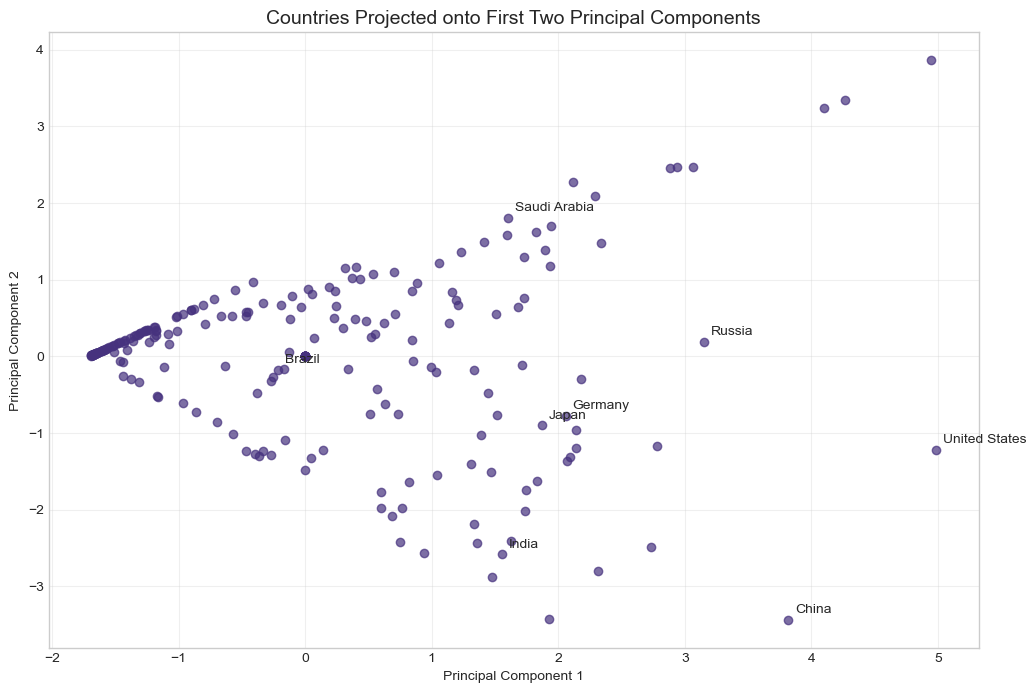

In [124]:
## Create a basic visualization of all countries
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(pca_df['x'], pca_df['y'], alpha=0.7)

# Label a few major countries
major_countries = ['United States', 'China', 'India', 'Russia', 'Germany', 'Japan', 'Brazil', 'Saudi Arabia']
for country in major_countries:
    if country in pca_df['country'].values:
        country_data = pca_df[pca_df['country'] == country].iloc[0]
        plt.annotate(
            country,
            (country_data['x'], country_data['y']),
            xytext=(5, 5),
            textcoords='offset points'
        )

plt.title('Countries Projected onto First Two Principal Components', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.show()

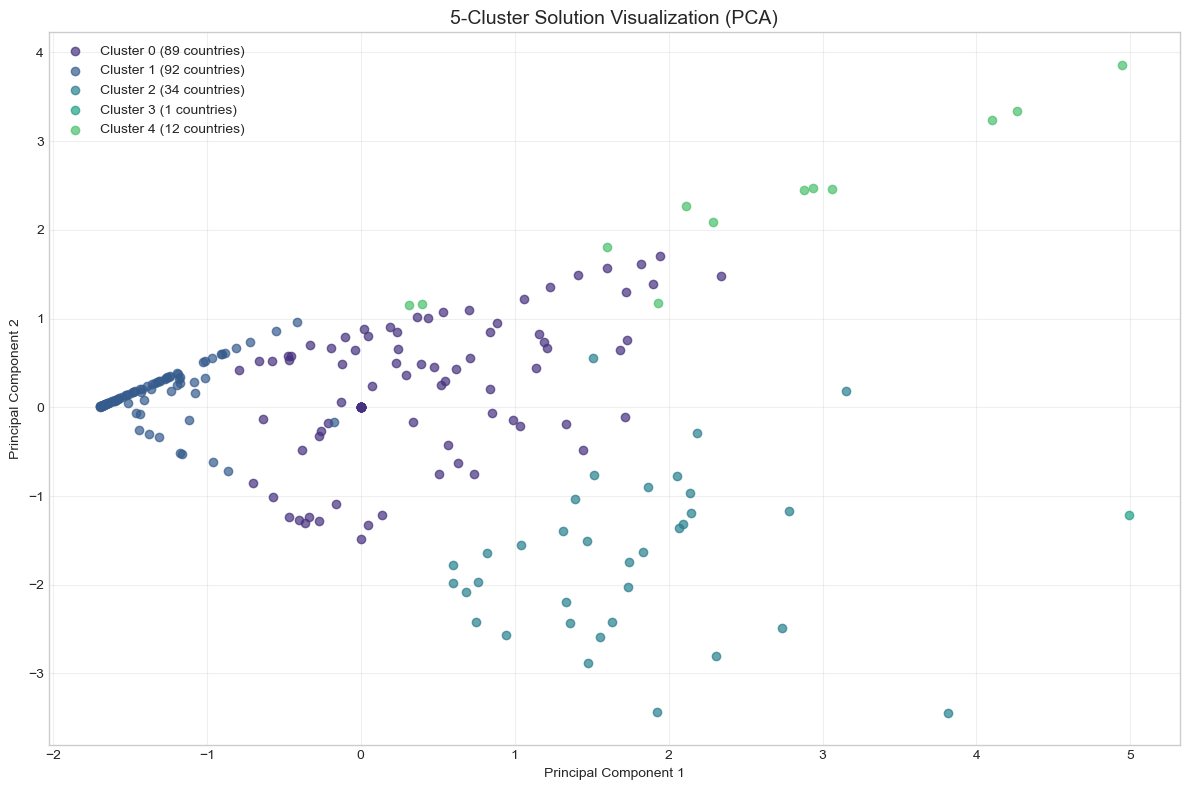

In [126]:
## Visualize the 5-cluster solution
plt.figure(figsize=(12, 8))

# Plot each cluster with a different color
for cluster_id in sorted(pca_df['cluster_5'].unique()):
    cluster_data = pca_df[pca_df['cluster_5'] == cluster_id]
    plt.scatter(
        cluster_data['x'], 
        cluster_data['y'],
        label=f'Cluster {cluster_id} ({len(cluster_data)} countries)',
        alpha=0.7
    )

plt.title('5-Cluster Solution Visualization (PCA)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

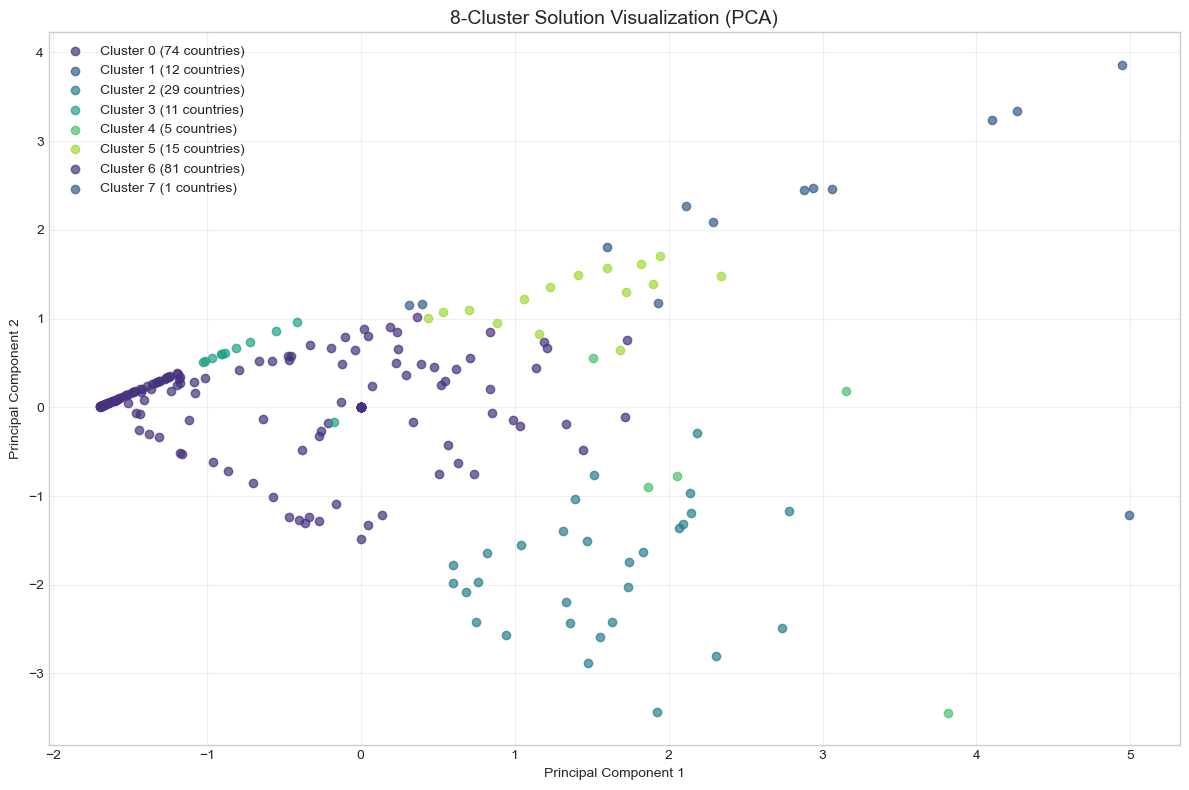

In [128]:
## Visualize the 8-cluster solution
plt.figure(figsize=(12, 8))

# Plot each cluster with a different color
for cluster_id in sorted(pca_df['cluster_8'].unique()):
    cluster_data = pca_df[pca_df['cluster_8'] == cluster_id]
    plt.scatter(
        cluster_data['x'], 
        cluster_data['y'],
        label=f'Cluster {cluster_id} ({len(cluster_data)} countries)',
        alpha=0.7
    )

plt.title('8-Cluster Solution Visualization (PCA)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

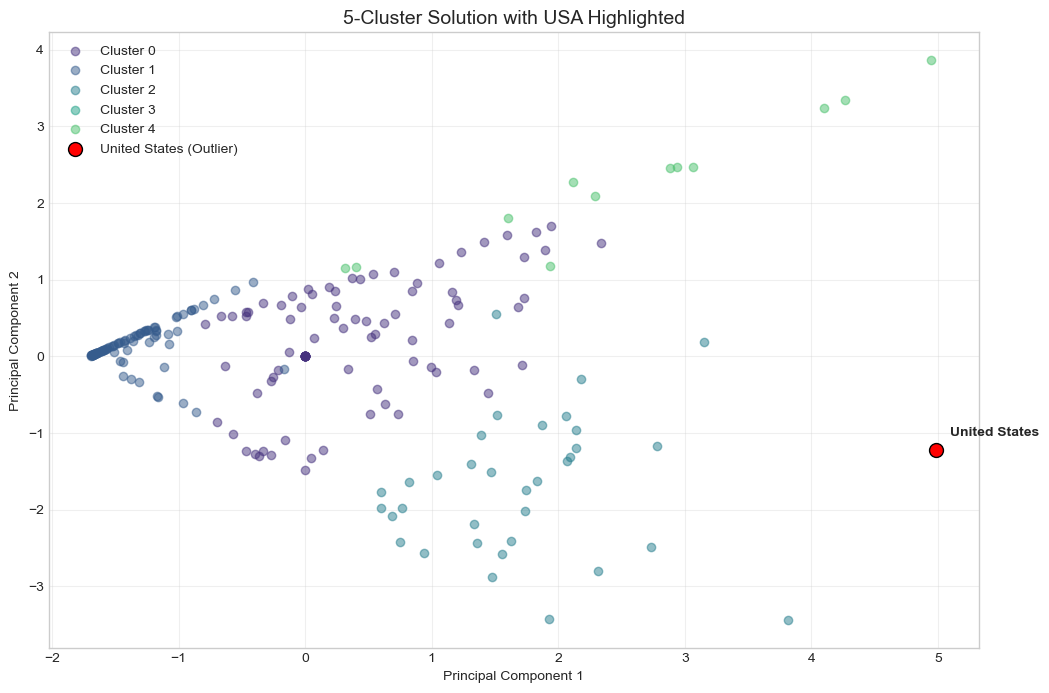

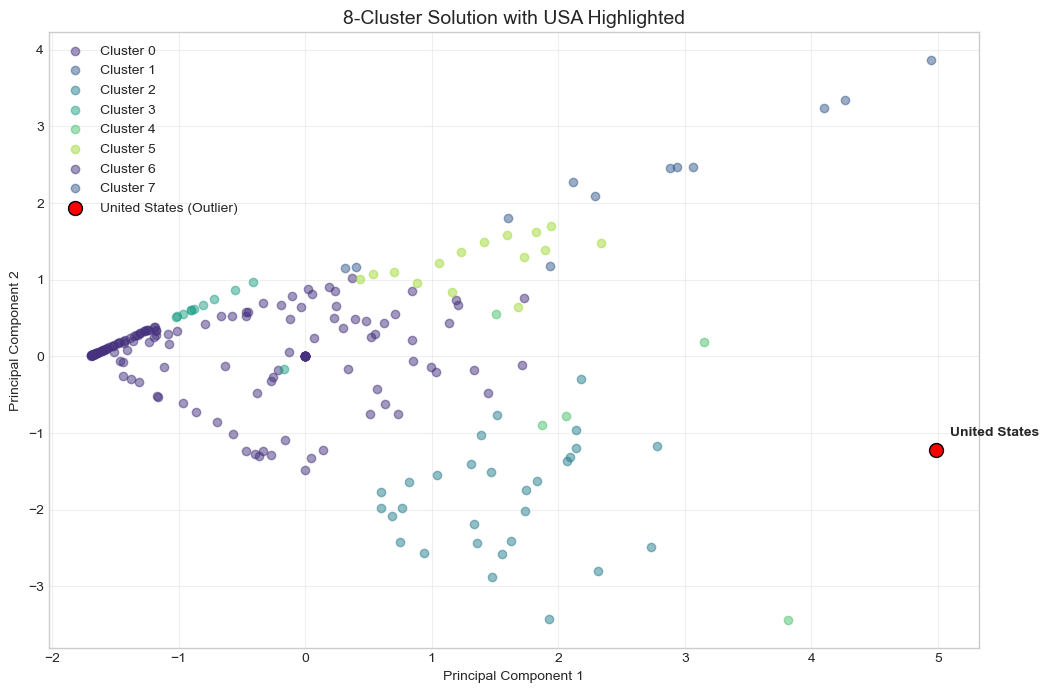

In [130]:
## Create visualizations highlighting the USA as an outlier
# For 5-cluster solution
plt.figure(figsize=(12, 8))

# Plot all clusters with lower alpha
for cluster_id in range(5):
    cluster_data = pca_df[pca_df['cluster_5'] == cluster_id]
    plt.scatter(
        cluster_data['x'], 
        cluster_data['y'],
        label=f'Cluster {cluster_id}',
        alpha=0.5
    )

# Highlight USA
usa_data = pca_df[pca_df['country'] == 'United States']
if not usa_data.empty:
    plt.scatter(
        usa_data['x'], 
        usa_data['y'],
        color='red',
        s=100,
        label='United States (Outlier)',
        edgecolors='black'
    )
    plt.annotate(
        'United States',
        (usa_data['x'].values[0], usa_data['y'].values[0]),
        xytext=(10, 10),
        textcoords='offset points',
        fontweight='bold'
    )

plt.title('5-Cluster Solution with USA Highlighted', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Similar visualization for 8-cluster solution
plt.figure(figsize=(12, 8))

# Plot all clusters with lower alpha
for cluster_id in range(8):
    cluster_data = pca_df[pca_df['cluster_8'] == cluster_id]
    plt.scatter(
        cluster_data['x'], 
        cluster_data['y'],
        label=f'Cluster {cluster_id}',
        alpha=0.5
    )

# Highlight USA
if not usa_data.empty:
    plt.scatter(
        usa_data['x'], 
        usa_data['y'],
        color='red',
        s=100,
        label='United States (Outlier)',
        edgecolors='black'
    )
    plt.annotate(
        'United States',
        (usa_data['x'].values[0], usa_data['y'].values[0]),
        xytext=(10, 10),
        textcoords='offset points',
        fontweight='bold'
    )

plt.title('8-Cluster Solution with USA Highlighted', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 6. Prepare for Tableau Visualization

In [133]:
## Calculate cluster profiles to understand characteristics
# For 5-cluster solution
cluster_5_profiles = df_cluster.groupby('cluster_5')[['co2_per_capita', 'coal_share', 'oil_share', 'gas_share', 'cumulative_co2']].mean().round(2)
print("5-Cluster Profiles:")
print(cluster_5_profiles)

# For 8-cluster solution
cluster_8_profiles = df_cluster.groupby('cluster_8')[['co2_per_capita', 'coal_share', 'oil_share', 'gas_share', 'cumulative_co2']].mean().round(2)
print("\n8-Cluster Profiles:")
print(cluster_8_profiles)

5-Cluster Profiles:
           co2_per_capita  coal_share  oil_share  gas_share  cumulative_co2
cluster_5                                                                  
0                    3.53        0.14       0.55       0.31         4066.53
1                    2.88        0.02       0.98       0.01          127.79
2                    6.82        0.59       0.29       0.12        24310.22
3                   15.73        0.21       0.46       0.33       412183.81
4                   20.52        0.02       0.38       0.60         5630.68

8-Cluster Profiles:
           co2_per_capita  coal_share  oil_share  gas_share  cumulative_co2
cluster_8                                                                  
0                    3.53        0.17       0.60       0.23         4019.88
1                   20.52        0.02       0.38       0.60         5630.68
2                    6.55        0.63       0.29       0.09         8656.62
3                   10.88        0.02       0.9

In [135]:
## Create descriptive labels for clusters based on profile analysis

# Create descriptive labels for 5-cluster solution
cluster_5_descriptions = {
    0: "Moderate Mixed-Source Emitters",
    1: "Oil-Dependent Low-Impact Economies",
    2: "Coal-Dependent Heavy Emitters",
    3: "Exceptional Emitter: Unique Emissions Profile",  # USA
    4: "Gas-Dominant High Per-Capita Emitters"
}

# Create descriptive labels for 8-cluster solution
cluster_8_descriptions = {
    0: "Moderate Mixed-Source Emitters",
    1: "Gas-Dominant High Per-Capita Emitters",  # Same as cluster 4 in 5-cluster solution
    2: "Coal-Dependent Industrializing Economies",
    3: "Ultra Oil-Dependent Nations",  # Almost 100% oil with high per-capita
    4: "Major Historical Emitters",  # Massive cumulative emissions with balanced mix
    5: "Gas-Focused Moderate Emitters",
    6: "Low-Emission Oil-Dependent Economies",
    7: "Exceptional Emitter: Unique Emissions Profile"  # USA
}

# Add descriptive labels to the dataframe
df_cluster['cluster_5_name'] = df_cluster['cluster_5'].map(cluster_5_descriptions)
df_cluster['cluster_8_name'] = df_cluster['cluster_8'].map(cluster_8_descriptions)

# Check the first few countries with their cluster assignments
df_cluster

,country,year,iso_code,co2,co2_per_capita,co2_growth_abs,coal_co2,oil_co2,gas_co2,cement_co2,...,entity_type,fossil_emissions,coal_share,oil_share,gas_share,cluster,cluster_5,cluster_8,cluster_5_name,cluster_8_name
0,Afghanistan,2019,AFG,11.082,0.293,0.264,3.955,6.843,0.246,0.038,...,Country,11.044,0.358113,0.619612,0.022275,0,0,0,Moderate Mixed-Source Emitters,Moderate Mixed-Source Emitters
1,Aland Islands,2019,ALA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Country,NaN,NaN,NaN,NaN,0,0,0,Moderate Mixed-Source Emitters,Moderate Mixed-Source Emitters
2,Albania,2019,ALB,4.947,1.722,-0.037,0.322,3.440,0.132,1.048,...,Country,3.894,0.082691,0.883410,0.033898,6,1,6,Oil-Dependent Low-Impact Economies,Low-Emission Oil-Dependent Economies
3,Algeria,2019,DZA,179.505,4.203,5.593,1.096,59.158,91.250,11.028,...,Country,151.504,0.007234,0.390472,0.602294,5,0,5,Moderate Mixed-Source Emitters,Gas-Focused Moderate Emitters
4,Andorra,2019,AND,0.480,6.286,-0.015,0.000,0.480,0.000,0.000,...,Country,0.480,0.000000,1.000000,0.000000,6,1,6,Oil-Dependent Low-Impact Economies,Low-Emission Oil-Dependent Economies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,Wallis and Futuna,2019,WLF,0.026,2.186,0.000,0.000,0.026,0.000,0.000,...,Country,0.026,0.000000,1.000000,0.000000,6,1,6,Oil-Dependent Low-Impact Economies,Low-Emission Oil-Dependent Economies
224,Western Sahara,2019,ESH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Country,NaN,NaN,NaN,NaN,0,0,0,Moderate Mixed-Source Emitters,Moderate Mixed-Source Emitters
225,Yemen,2019,YEM,12.684,0.402,2.210,0.355,10.124,0.198,0.664,...,Country,10.677,0.033249,0.948206,0.018545,6,1,6,Oil-Dependent Low-Impact Economies,Low-Emission Oil-Dependent Economies
226,Zambia,2019,ZMB,7.747,0.421,0.335,2.348,4.439,0.000,0.961,...,Country,6.787,0.345956,0.654044,0.000000,0,0,0,Moderate Mixed-Source Emitters,Moderate Mixed-Source Emitters


In [137]:
# Export the labeled dataset for Tableau
export_cols = [
    'country', 'iso_code', 
    'co2', 'co2_per_capita', 'coal_co2', 'oil_co2', 'gas_co2', 'cement_co2',
    'cumulative_co2', 'land_use_change_co2', 'population',
    'coal_share', 'oil_share', 'gas_share',
    'cluster_5', 'cluster_5_name', 'cluster_8', 'cluster_8_name'
]

df_export = df_cluster[export_cols]
df_export.to_csv('/Users/samabrams/Data Analysis Projects/CO2 Emissions Tableau Project/02 Data/Prepared Dataemissions_clusters_for_tableau.csv', index=False)

OSError: Cannot save file into a non-existent directory: '/Users/samabrams/Data Analysis Projects/CO2 Emissions Tableau Project/02 Data'

In [141]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# List of numerical columns to normalize (excluding cluster columns)
columns_to_normalize = [
    'co2', 'co2_per_capita', 'coal_co2', 'oil_co2', 'gas_co2', 
    'cement_co2', 'cumulative_co2', 'land_use_change_co2', 
    'population', 'coal_share', 'oil_share', 'gas_share'
]

# Create normalized columns
for col in columns_to_normalize:
    # Normalize the column and create a new column with '_normalized' suffix
    df_export[f'{col}_normalized'] = scaler.fit_transform(df_export[[col]])

# Save the updated dataframe with normalized columns
df_export.to_csv('/Users/samabrams/Data Analysis Projects/CO2_Emissions_Project/02 Data/Prepared Data/emissions_clusters_normalized.csv', index=False)

# Print out some information to verify
print("Original dataframe shape:", df_export.shape)
print("\nNormalized columns added:")
for col in columns_to_normalize:
    print(f"{col}_normalized")

# Display summary of normalized columns
print("\nNormalized Columns Summary:")
normalized_cols = [f'{col}_normalized' for col in columns_to_normalize]
print(df_export[normalized_cols].describe())

Original dataframe shape: (228, 30)

Normalized columns added:
co2_normalized
co2_per_capita_normalized
coal_co2_normalized
oil_co2_normalized
gas_co2_normalized
cement_co2_normalized
cumulative_co2_normalized
land_use_change_co2_normalized
population_normalized
coal_share_normalized
oil_share_normalized
gas_share_normalized

Normalized Columns Summary:
       co2_normalized  co2_per_capita_normalized  coal_co2_normalized  \
count      214.000000                 214.000000           214.000000   
mean         0.015584                   0.132051             0.009121   
std          0.078940                   0.154244             0.070851   
min          0.000000                   0.000000             0.000000   
25%          0.000137                   0.026296             0.000000   
50%          0.000978                   0.083380             0.000024   
75%          0.005437                   0.171196             0.000883   
max          1.000000                   1.000000            

/var/folders/38/rbb9c58x57z0q20kbt7l13pr0000gn/T/ipykernel_30554/4090989933.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_export[f'{col}_normalized'] = scaler.fit_transform(df_export[[col]])
/var/folders/38/rbb9c58x57z0q20kbt7l13pr0000gn/T/ipykernel_30554/4090989933.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_export[f'{col}_normalized'] = scaler.fit_transform(df_export[[col]])
/var/folders/38/rbb9c58x57z0q20kbt7l13pr0000gn/T/ipykernel_30554/4090989933.py:16: SettingWithCopyWarning: 
A 

In [143]:
df_export.head()

,country,iso_code,co2,co2_per_capita,coal_co2,oil_co2,gas_co2,cement_co2,cumulative_co2,land_use_change_co2,...,coal_co2_normalized,oil_co2_normalized,gas_co2_normalized,cement_co2_normalized,cumulative_co2_normalized,land_use_change_co2_normalized,population_normalized,coal_share_normalized,oil_share_normalized,gas_share_normalized
0,Afghanistan,AFG,11.082,0.293,3.955,6.843,0.246,0.038,194.437,0.330,...,0.000524,0.002898,0.000147,0.000046,0.000471,0.033814,0.026562,0.382083,0.594151,0.024563
1,Aland Islands,ALA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,0.033594,NaN,NaN,NaN,NaN
2,Albania,ALB,4.947,1.722,0.322,3.440,0.132,1.048,284.491,0.220,...,0.000043,0.001455,0.000079,0.001267,0.000690,0.033741,0.002020,0.088226,0.875606,0.037381
3,Algeria,DZA,179.505,4.203,1.096,59.158,91.250,11.028,4513.793,2.162,...,0.000145,0.025076,0.054510,0.013337,0.010950,0.035034,0.030033,0.007718,0.349673,0.664168
4,Andorra,AND,0.480,6.286,0.000,0.480,0.000,0.000,14.583,0.000,...,0.000000,0.000201,0.000000,0.000000,0.000035,0.033594,0.000052,0.000000,1.000000,0.000000
